回归需求在现实中非常多，所以我们自然也有各种各样的回归类算法。最著名的就是我们的线性回归和逻辑回归，从他们衍生出了岭回归，Lasso，弹性网，除此之外，还有众多分类算法改进后的回归，比如回归树，随机森林的回归，支持向量回归，贝叶斯回归等等。除此之外，我们还有各种鲁棒的回归：比如RANSAC，Theil-Sen估计，胡贝尔回归等等。考虑到回归问题在现实中的泛用性,回归家族非常繁荣昌盛。

![Title](1581438708(1).jpg)

### 记得在逻辑回归和SVM中，我们都是先定义了损失函数，然后通过最小化损失函数或损失函数的某种变化来将求解参数向量，以此将单纯的求解问题转化为一个最优化问题。在多元线性回归中，我们的损失函数如下定义:

![Title](1581438841(1).jpg)

## sklearn.linear_model.LinearRegression
classsklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

![Title](1581440015(1).jpg)

线性回归的类仅有四个参数就可以完成一个完整的算法。并且看得出，这些参数中并没有一个是必填的，更没有对我们的模型有不可替代作用的参数。这说明，线性回归的性能，往往取决于数据本身，而并非是我们的调参能力，线性回归也因此对数据有着很高的要求。幸运的是，现实中大部分连续型变量之间，都存在着或多或少的线性联系。所以线性回归虽然简单，却很强大。

sklearn中的线性回归可以处理多标签问题，只需要在fit的时候输入多维度标签就可以了

In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价格数据集
import pandas as pd

In [2]:
housevalue = fch() #实例化

In [3]:
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [4]:
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
X = pd.DataFrame(housevalue.data) #放入Dataframe方便查看
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X.shape #20640样本 8个特征

(20640, 8)

In [7]:
y = housevalue.target 

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
housevalue.feature_names #特征名字

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
X.columns = housevalue.feature_names #将housevalue的特征名称赋给X

"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

分训练集和测试集

In [11]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])
    
Xtrain.shape
#如果要进行数据标准化，那要先分成训练集和和测试集分别标准化
#先用训练集训练（fit）标准化的类，然后用训练好的类分别转化（transform）训练集合测试集

(14448, 8)

建模

In [12]:
reg = LR().fit(Xtrain,Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

探索建好的模型

In [13]:
reg.coef_ #w 系数向量

#对应
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [14]:
[*zip(Xtrain.columns,reg.coef_)] #zip将columns和系数匹配起来

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294493672),
 ('AveRooms', -0.10780721617317635),
 ('AveBedrms', 0.6264338275363786),
 ('Population', 5.21612535341231e-07),
 ('AveOccup', -0.0033485096463336797),
 ('Latitude', -0.413095937894771),
 ('Longitude', -0.42621095362084827)]

## 回归率的模型评估指标
---
我们有两种不同的角度来看待回归的效果：是否预测到了正确的数值，是否拟合到了足够的信息

使用均方误差MSE（mean squared error）来衡量预测值与真实值的差异
![Title](1581496936(1).jpg)

In [15]:
from sklearn.metrics import mean_squared_error as MSE

MSE(yhat,Ytest) #预测值和真实值

0.5309012639324571

In [16]:
Ytest.mean() #可以看出 0.5 和 2。0 错误率20%

2.0819292877906976

In [17]:
cross_val_score(reg,X,y,cv=10,scoring='mean_squared_error') #交叉验证
'''报错'''

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [19]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [20]:
'''这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)。在sklearn当中，所有的损失都使用负数
表示，因此均方误差也被显示为负数了'''
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error') #交叉验证 注意是负平方误差

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

### 是否拟合了做够的信息

![Title](1581498063(1).jpg)

![Title](1581499356(1).jpg)

In [21]:
from sklearn.metrics import r2_score
r2_score(yhat,Ytest) #预测值和真实值

0.3380653761555984

In [22]:
r2 = reg.score(Xtest,Ytest)
r2 #发现不同

0.6043668160178817

在我们的分类模型的评价指标当中，我们进行的是一种 if a == b的对比，这种判断和if b == a其实完全是一种概念，所以我们在进行模型评估的时候，从未踩到我们现在在的这个坑里。然而看R2的计算公式，R2明显和分类模型的指标中的accuracy或者precision不一样，R2涉及到的计算中对预测值和真实值有极大的区别，必须是预测值在分子，真实值在分母，所以我们在调用metrcis模块中的模型评估指标的时候，必须要检查清楚，指标的参数中，究竟是要求我们先输入真实值还是先输入预测值

In [23]:
r2_score(Ytest,yhat) #上面的输入犯了

0.6043668160178817

In [24]:
#或者也可以指定参数，就不必在意顺序了
r2_score(y_true=Ytest,y_pred=yhat) #有40%的信息都被遗漏了

0.6043668160178817

In [25]:
cross_val_score(reg,X,y,cv=10,scoring='r2').mean()#交叉验证分数的平均值 

0.5110068610524556

我们观察到，我们在加利福尼亚房屋价值数据集上的MSE其实不是一个很大的数（0.5），但我们的不高，这证明我们的模型比较好地拟合了一部分数据的数值，却没有能正确拟合数据的分布

In [26]:
'''观察数据和预测值的趋势'''
import matplotlib.pyplot as plt

plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

可见，虽然我们的大部分数据被拟合得比较好，但是图像的开头和结尾处却又着较大的拟合误差。如果我们在图像右侧分布着更多的数据，我们的模型就会越来越偏离我们真正的标签。这种结果类似于我们前面提到的，虽然在有限的数据集上将数值预测正确了，但却没有正确拟合数据的分布，如果有更多的数据进入我们的模型，那数据标签被预测错误的可能性是非常大的。

In [27]:
import numpy as np

rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.11480837,   -5.70837982,  -15.38196168,  -77.07714165,
        -61.98484963])

### 多重共线性
---
多重共线性如果存在，则线性回归就无法使用最小二乘法来进行求解，或者求解就会出现偏差。幸运的是，不能存在多重共线性，不代表不能存在相关性——机器学习不要求特征之间必须独立，必须不相关，只要不是高度相关或者精确相关就好。

#### 多重共线性 Multicollinearity 与相关性 Correlation
多重共线性是一种统计现象，是指线性模型中的特征（解释变量）之间由于存在精确相关关系或高度相关关系，多重共线性的存在会使模型无法建立，或者估计失真。多重共线性使用指标方差膨胀因子（variance inflationfactor，VIF）来进行衡量（from statsmodels.stats.outliers_influence import variance_inflation_factor），通常当我们提到“共线性”，都特指多重共线性。

相关性是衡量两个或多个变量一起波动的程度的指标，它可以是正的，负的或者0。当我们说变量之间具有相关性，通常是指线性相关性，线性相关一般由皮尔逊相关系数进行衡量，非线性相关可以使用斯皮尔曼相关系数或者互信息法进行衡量。

在现实中特征之间完全独立的情况其实非常少，因为大部分数据统计手段或者收集者并不考虑统计学或者机器学习建模时的需求，现实数据多多少少都会存在一些相关性，极端情况下，甚至还可能出现收集的特征数量比样本数量多的情况。通常来说，这些相关性在机器学习中通常无伤大雅（在统计学中他们可能是比较严重的问题），即便有一些偏差，只要最小二乘法能够求解，我们都有可能会无视掉它。毕竟，想要消除特征的相关性，无论使用怎样的手段，都无法避免进行特征选择，这意味着可用的信息变得更加少，对于机器学习来说，很有可能尽量排除相关性后，模型的整体效果会受到巨大的打击。这种情况下，我们选择不处理相关性，只要结果好，一切万事大吉。

## 岭回归
#### 岭回归解决多重共线性问题
---
岭回归，又称为吉洪诺夫正则化（Tikhonov regularization）。
![Title](1581512548(1).png)

####  linear_model.Ridge
classsklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None,tol=0.001, solver=’auto’, random_state=None)

真正核心的参数是正则化的系数a，其他的参数是当我们希望使用最小二乘法之外的求解方法求解岭回归的时候才需要的，一般不进行修改。

之前我们在加利佛尼亚房屋价值数据集上使用线性回归，得出的结果大概是训练集上的拟合程度是60%，测试集上的拟合程度也是60%左右，那这个很低的拟合程度是不是由多重共线性造成的呢？在统计学中，我们会通过VIF或者各种检验来判断数据是否存在共线性，然而在机器学习中，我们可以使用模型来判断——如果一个数据集在岭回归中使用各种正则化参数取值下模型表现没有明显上升（比如出现持平或者下降），则说明数据没有多重共线性，顶多是特征之间有一些相关性。反之，如果一个数据集在岭回归的各种正则化参数取值下表现出明显的上升趋势，则说明数据存在多重共线性。

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
             ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

#数据集索引恢复
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])
    
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) #返回的和线性模型的分数一样 所以房屋价值数据集中应该不是共线性问题

0.6043610352312279

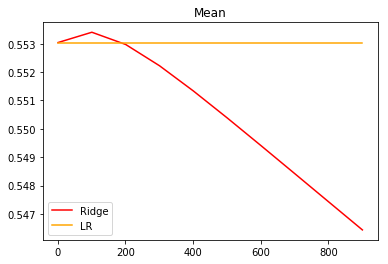

'数据集带有较为轻微的共线性'

In [30]:
'''交叉验证下，与线性回归相比，岭回归的结果如何变化'''
alpharange = np.arange(1,1001,100)

ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha) #岭回归
    linear = LinearRegression() #线性回归
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean() #交叉验证岭回归分数
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').mean() #
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Mean')
plt.legend()
plt.show()
'''数据集带有较为轻微的共线性'''

可以看出，加利佛尼亚数据集上，岭回归的结果轻微上升，随后骤降。可以说，加利佛尼亚房屋价值数据集带有很轻微的一部分共线性，这种共线性被正则化参数消除后，模型的效果提升了一点点，但是对于整个模型而言是杯水车薪。在过了控制多重共线性的点后，模型的效果飞速下降，显然是正则化的程度太重，挤占了参数w本来的估计空间。从这个结果可以看出，加利福尼亚州数据集的核心问题不在于多重共线性，岭回归不能够提升模型表现

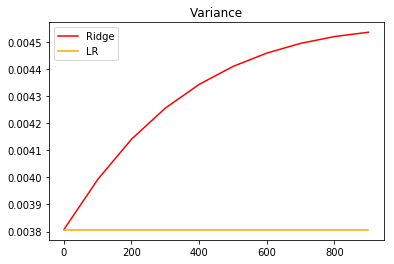

In [31]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)

ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha) #岭回归
    linear = LinearRegression() #线性回归
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').var() #交叉验证岭回归分数方差
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').var()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Variance')
plt.legend()
plt.show()

![Title](1581514149(1).png)

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

X = load_boston().data
y = load_boston().target

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [33]:
X.shape #506个样本13个特征

(506, 13)

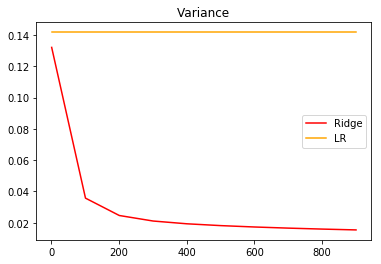

In [34]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)

ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha) #岭回归
    linear = LinearRegression() #线性回归
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').var() #交叉验证岭回归分数方差
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').var()
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Variance')
plt.legend()
plt.show()
plt.show()

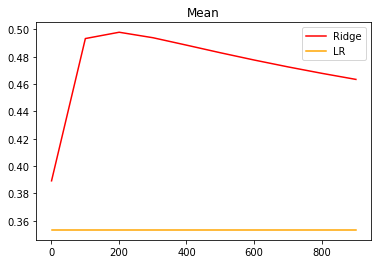

In [35]:
alpharange = np.arange(1,1001,100)

ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha) #岭回归
    linear = LinearRegression() #线性回归
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean() #交叉验证岭回归分数
    linears = cross_val_score(linear,X,y,cv=5,scoring='r2').mean() #
    ridge.append(regs)
    lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

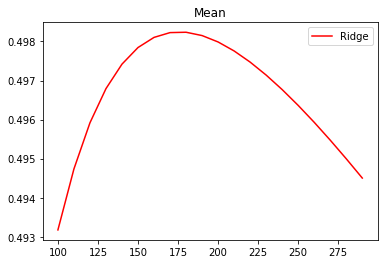

In [36]:
# 细化学习曲线
alpharange = np.arange(100,300,10)

ridge,lr = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha) #岭回归
    #linear = LinearRegression() #线性回归
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean() #交叉验证岭回归分数
    #linears = cross_val_score(linear,X,y,cv=5,scoring='r2').mean() #
    ridge.append(regs)
    #lr.append(linears)
    
plt.plot(alpharange,ridge,color='red',label='Ridge')
#plt.plot(alpharange,lr,color='orange',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

可以发现，比起加利佛尼亚房屋价值数据集，波士顿房价数据集的方差降低明显，偏差也降低明显，可见使用岭回归还是起到了一定的作用，模型的泛化能力是有可能会上升的。

遗憾的是，没有人会希望自己获取的数据中存在多重共线性，因此发布到scikit-learn或者kaggle上的数据基本都经过一定的多重共线性的处理的，要找出绝对具有多重共线性的数据非常困难，也就无法给大家展示岭回归在实际数据中大显身手的模样。我们也许可以找出具有一些相关性的数据，但是大家如果去尝试就会发现，基本上如果我们使用岭回归或者Lasso，那模型的效果都是会降低的，很难升高，这恐怕也是岭回归和Lasso一定程度上被机器学习领域冷遇的原因。

### 选取最佳的正则化参数取值

###### 我们应该使用交叉验证来选择最佳的正则化系数。在sklearn中，我们有带交叉验证的岭回归可以使用，我们来看一看：
classsklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None,cv=None, gcv_mode=None, store_cv_values=False)


![Title](1581515747(1).jpg)

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
             ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

Ridge_ = RidgeCV(alphas=np.arange(1,1001,100) #1到1001 每100取一个值
                #,scoring='neg_mean_squared_error' 默认R平方
                ,store_cv_values=True
                #,cv=5 默认留一交叉验证
                ).fit(X,y)

In [38]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060251767338442

In [39]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape

(20640, 10)

In [40]:
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [41]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0) #共十个 因为100 到 1001 每100取一个数 就是十个

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [42]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

## Lasso
---
Lasso与多重共线性

![Title](1581518099(1).jpg)

### Lasso的核心作用：特征选择
classsklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False,copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
             ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [44]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.73589305968401,
 1.0211268294493672,
 -10.780721617317635,
 62.64338275363785,
 5.2161253534123096e-05,
 -0.33485096463336794,
 -41.3095937894771,
 -42.62109536208483]

In [45]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73589305968398,
 1.0211268294494116,
 -10.78072161731758,
 62.643382753637276,
 5.2161253532697085e-05,
 -0.33485096463335795,
 -41.3095937894769,
 -42.62109536208446]

In [46]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[43.73589305968403,
 1.0211268294494056,
 -10.780721617317713,
 62.643382753638086,
 5.216125353268129e-05,
 -0.33485096463335795,
 -41.30959378947712,
 -42.6210953620847]

这三条分别是这样的内容：
    1. 正则化系数为0，这样算法不可收敛！如果你想让正则化系数为0，请使用线性回归吧
    2. 没有正则项的坐标下降法可能会导致意外的结果，不鼓励这样做！
    3. 目标函数没有收敛，你也许想要增加迭代次数，使用一个非常小的alpha来拟合模型可能会造成精确度问题！

有了坐标下降，就有迭代和收敛的问题，因此sklearn不推荐我们使用0这样的正则化系数。如果我们的确希望取到0，那我们可以使用一个比较很小的数，比如0.01

In [47]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73575720621596,
 1.0211292318121803,
 -10.780460336251622,
 62.64202320775658,
 5.217068073242414e-05,
 -0.33485065170676187,
 -41.30957143229132,
 -42.62105388932396]

In [48]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[40.10568371834486,
 1.0936292607860143,
 -3.7423763610244563,
 26.524037834897207,
 0.00035253685115039395,
 -0.3207129394887798,
 -40.06483047344844,
 -40.81754399163317]

In [49]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[34.62081517607693,
 1.5196170869238688,
 0.3968610529210192,
 0.9151812510354818,
 0.0021739238012248416,
 -0.34768660148100994,
 -14.736963474215269,
 -13.435576102526921]

In [50]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [51]:
#看来10**4对于Lasso来说是个过大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.0002806598632900997,
 -0.0,
 -0.0,
 -0.0]

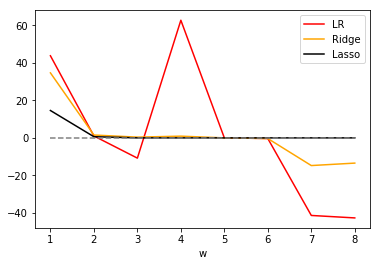

In [52]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")

plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

可见，比起岭回归，Lasso所带的L1正则项对于系数的惩罚要重得多，并且它会将系数压缩至0，因此可以被用来做特征选择。也因此，我们往往让Lasso的正则化系数a在很小的空间中变动，以此来寻找最佳的正则化系数。

## 选取最佳的正则化参数取值
classsklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True,normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, copy_X=True, cv=’warn’, verbose=False,n_jobs=None, positive=False, random_state=None, selection=’cyclic’)

使用交叉验证的Lasso类的参数看起来与岭回归略有不同，这是由于Lasso对于alpha的取值更加敏感的性质决定的。之前提到过，由于Lasso对正则化系数的变动过于敏感，因此我们往往让a在很小的空间中变动。这个小空间小到超乎人们的想象（不是0.01到0.02之间这样的空间，这个空间对lasso而言还是太大了），因此我们设定了一个重要概念“正则化路径”，用来设定正则化系数的变动

和岭回归的交叉验证类相似，除了进行交叉验证之外，LassoCV也会单独建立模型。它会先找出最佳的正则化参数，然后在这个参数下按照模型评估指标进行建模。需要注意的是，LassoCV的模型评估指标选用的是均方误差，而岭回归的模型评估指标是可以自己设定的，并且默认是R平方。
![Title](1581579294(1).jpg)

In [53]:
from sklearn.linear_model import LassoCV

#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10,-2,200,base=10)
#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方

alpharange

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [54]:
alpharange.shape

(200,)

In [55]:
lasso_ = LassoCV(alphas=alpharange#自行输入的alpha取值范围
                ,cv=5#交叉验证的折数
                ).fit(Xtrain,Ytrain)

In [56]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [57]:
#调用所有交叉验证结果
lasso_.mse_path_  #均方误差 

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [58]:
#返回每个alpha下的五折交叉验证结果
lasso_.mse_path_.shape

(200, 5)

In [59]:
lasso_.mse_path_.mean(axis=1)#有注意到在岭回归中我们的轴向是axis=0

#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [60]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_ #每一个特征对应的系数 共8个特征

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [61]:
lasso_.score(Xtest,Ytest)

0.6038982670571436

In [62]:
#与线性回归相比
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043668160178817

In [63]:
#使用LassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
             ,n_alphas=300 #取出300个alpha取值
             ,cv=5
            ).fit(Xtrain, Ytrain)

In [64]:
ls_.alpha_#最佳alpha参数

0.0020954551690628535

In [65]:
ls_.alphas_ #查看所有自动生成的alpha取值 共300个

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [66]:
ls_.score(Xtest,Ytest)

0.6038915423819201

In [67]:
ls_.coef_#每个特征下对应的系数

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

### 对于回归问题，数据若能分布为一条直线，则是线性的，否则是非线性的。对于分类问题，数据分布若能使用一条直线来划分类别，则是线性可分的，否则数据则是线性不可分的

![Title](1581586871(1).jpg)

In [68]:
'''观察线性回归在非线性数据上的表现'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.tree import DecisionTreeRegressor #决策树回归

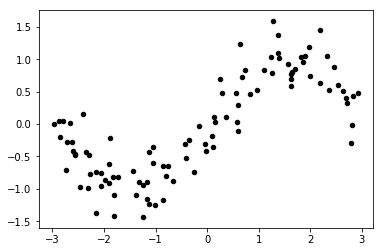

In [69]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3,3,size=100) #random.uniform 从输入的任意两个整数中取出size个随机数

#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal生成size个服从正态分布的随机数

#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [70]:
# 为后续建模做准备，sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [71]:
X = X.reshape(-1,1)
X.shape

(100, 1)

In [72]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X,y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X,y)

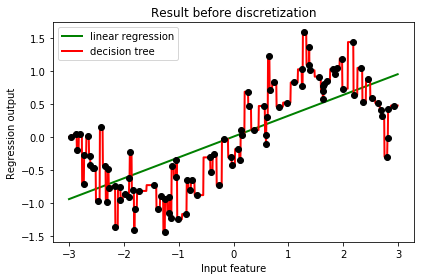

In [73]:
#放置画布
fig,ax1 = plt.subplots(1)

#创建测试数据，一系列分布在横坐标上的点
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1) #转换为二维形式

#将测试数据带入predict接口，获得模型的拟合效果斌进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:,0],y,'o',c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

![Title](1581598027(1).jpg)

## 注意 可使用分箱技术来提高模型效果 如上图的第四和第五个子图

从上面的图中，我们可以观察出一个特性：线性模型们的决策边界都是一条条平行的直线，而非线性模型们的决策边界是交互的直线（格子），曲线，环形等等。对于分类模型来说，这是我们判断模型是线性还是非线性的重要评判因素：线性模型的决策边界是平行的直线，非线性模型的决策边界是曲线或者交叉的直线。之前我们提到，模型上如果自变量上的最高次方为1，则模型是线性的，但这种方式只适用于回归问题。分类模型中，我们很少讨论模型是否线性，因为我们很少使用线性模型来执行分类任务（逻辑回归是一个特例）。但从上面我们总结出的结果来看，我们可以认为对分类问题而言，如果一个分类模型的决策边界上自变量的最高次方为1，则我们称这个模型是线性模型。

![Title](1581599157(1).jpg)

![Title](1581600215(1).jpg)

## 使用分箱处理非线性问题
让线性回归在非线性数据上表现提升的核心方法之一是对数据进行分箱，也就是离散化。与线性回归相比，我们常用的一种回归是决策树的回归。我们之前拟合过一条带有噪音的正弦曲线以展示多元线性回归与决策树的效用差异，我们来分析一下这张图，然后再使用采取措施帮助我们的线性回归。

##### 从之前的图像上可以看出，线性回归无法拟合出这条带噪音的正弦曲线的真实面貌，只能够模拟出大概的趋势，而决策树却通过建立复杂的模型将几乎每个点都拟合出来了。此时此刻，决策树正处于过拟合的状态，对数据的学习过于细致，而线性回归处于拟合不足的状态，这是由于模型本身只能够在线性关系间进行拟合的性质决定的。为了让线性回归在类似的数据上变得更加强大，我们可以使用分箱，也就是离散化连续型变量的方法来处理原始数据，以此来提升线性回归的表现。

In [74]:
from sklearn.preprocessing import KBinsDiscretizer #分箱 将原本连续的数据分成分类型

#将数据分箱
enc = KBinsDiscretizer(n_bins=10 #分几类
                       ,encode='onehot')#另外一种模式 ordinal
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0

X

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 0

In [75]:
X_binned #分箱后的数据 是一个稀疏矩阵

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [76]:
#使用pandas打开系数矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)

LinearR_.predict(line) #line作为测试集 从-3 到 3 选出的一千个随机数

ValueError: shapes (1000,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

In [78]:
print(line.shape)
print(X_binned.shape)

(1000, 1)
(100, 10)


In [79]:
#因此我们需要创建前后的测试集，按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)

LinearR_.predict(line_binned)

array([-0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22

#### 使用分箱数据进行建模和绘图

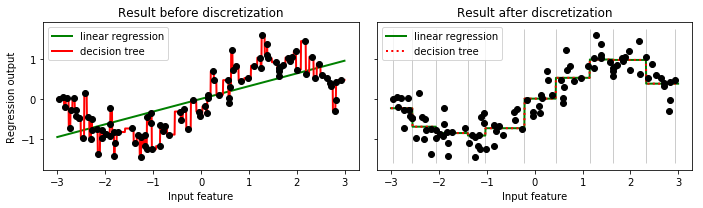

In [80]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

#将两张图像绘制在一起，布置画布
fig,(ax1,ax2) = plt.subplots(ncols=2
                            ,sharey=True#让两张图共享y轴的刻度
                            ,figsize=(10,3))

#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'#实线
         , label='linear regression')

ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',linestyle=':', label='decision tree')#虚线

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴 enc.bin_edges_返回分出的箱子的上限和下限
           , *plt.gca().get_ylim() #y轴的上限和下限
           , linewidth=1
           , alpha=.2)

#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')

#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

从图像上可以看出，离散化后线性回归和决策树上的预测结果完全相同了——线性回归比较成功地拟合了数据的分布，而决策树的过拟合效应也减轻了。由于特征矩阵被分箱，因此特征矩阵在每个区域内获得的值是恒定的，因此所有模型对同一个箱中所有的样本都会获得相同的预测值。与分箱前的结果相比，线性回归明显变得更加灵活，而决策树的过拟合问题也得到了改善。但注意，一般来说我们是不使用分箱来改善决策树的过拟合问题的，因为树模型带有丰富而有效的剪枝功能来防止过拟合。

在这个例子中，我们设置的分箱箱数为10，不难想到这个箱数的设定肯定会影响模型最后的预测结果，我们来看看不同的箱数会如何影响回归的结果：

0.8314901357806623


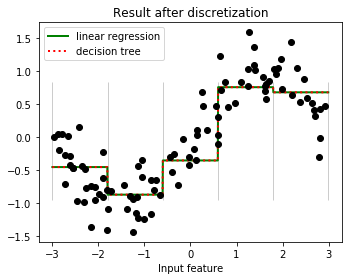

In [81]:
enc = KBinsDiscretizer(n_bins=5,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.fit_transform(line)

fig,ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned,y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

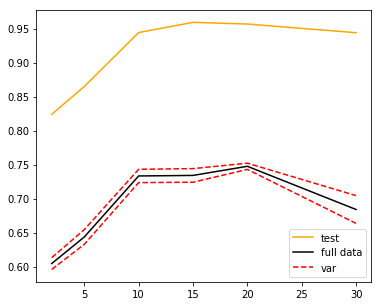

In [82]:
#怎样选取最优的箱子?
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean()) #全数据交叉验证的均值
    var.append(cvresult.var()) #全数据交叉验证的方差
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
    
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

###### 在20箱处，方差很小 模型稳定

0.887799658032006


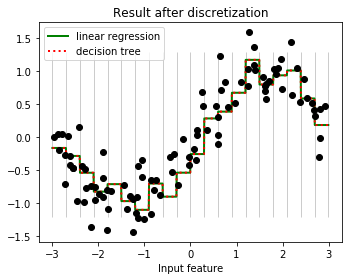

In [83]:
enc = KBinsDiscretizer(n_bins=20,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.fit_transform(line)

fig,ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned,y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

## 用多项式回归解决线性回归处理非线性问题

除了分箱之外，另外一种更普遍的用于解决线性回归只能处理线性数据“问题的手段，就是使用多项式回归对线性回归进行改进。这样的手法是机器学习研究者们从支持向量机中获得的：支持向量机通过升维可以将非线性可分数据转化为线性可分，然后使用核函数在低维空间中进行计算，这是一种“高维呈现，低维解释”的思维。那我们为什么不能让线性回归使用类似于升维的转换，将数据由非线性转换为线性，从而为线性回归赋予处理非线性数据的能力呢？当然可以。

![Title](1581604809(1).jpg)

In [84]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [85]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)

#接口transform直接调用
X_ = poly.fit_transform(X)
X_#升维后的数据

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [86]:
X_.shape

(3, 3)

In [91]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

不难注意到，多项式变化后数据看起来不太一样了：首先，数据的特征（维度）增加了，这正符合我们希望的将数据转换到高维空间的愿望。其次，维度的增加是有一定的规律的。不难发现，如果我们本来的特征矩阵中只有一个特征x，而转换后我们得到：

![Title](1581606427(1).jpg)

In [93]:
#三次多项式，不带与截距项相乘的x0 没有常数了
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [95]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)

xxx.shape #特征矩阵

(3, 4)

In [96]:
rnd = np.random.RandomState(42) #设置随机数种子

y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [97]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_  #查看系数

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [98]:
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [102]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept

#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [104]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [105]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [106]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

![Title](1581669834(1).jpg)

In [107]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

![Title](1581670516(1).jpg)

In [108]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [109]:
#对比之下，当interaction_only为True的时候，只生成交互项
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### 多项式回归处理非线性问题
---
希望通过将数据投影到高维的方式来帮助我们解决非线性问题

In [116]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3,3,size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

# 将X升维，准备好放入sklearn中
X = X.reshape(-1,1)

#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [117]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [118]:
#多项式拟合，设定高次项
d=5 

#进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)#转换为高次项的矩阵
line_ = PF(degree=d).fit_transform(line)#转换为高次项的矩阵

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.8561679370344799

In [119]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787955

### 将数据可视化

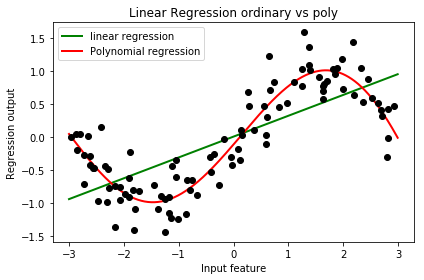

In [120]:
import matplotlib.pyplot as plt

d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)#升维
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)#将数据升维

#放置画布
fig, ax1 = plt.subplots(1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

'''绿色的线是线性回归
    红色的线时多项式回归'''

从这里大家可以看出，多项式回归能够较好地拟合非线性数据，还不容易发生过拟合，可以说是保留了线性回归作为线性模型所带的“不容易过拟合”和“计算快速”的性质，同时又实现了优秀地拟合非线性数据。

### 多项式回归的可解释性

线性回归是一个具有高解释性的模型，它能够对每个特征拟合出参数w以帮助我们理解每个特征对于标签的作用。当我们进行了多项式转换后，尽管我们还是形成形如线性回归的方程，但随着数据维度和多项式次数的上升，方程也变得异常复杂，我们可能无法一眼看出增维后的特征是由之前的什么特征组成的（之前我们都是肉眼看肉眼判断）。不过，多项式回归的可解释性依然是存在的，我们可以使用接口get_feature_names来调用生成的新特征矩阵的各个特征上的名称，以便帮助我们解释模型。来看下面的例子：

In [121]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures #多项式处理
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3,3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [122]:
poly = PolynomialFeatures(degree=5).fit(X) #转化为5维

#重要接口 get_feature_names 注意是接口不是属性 要加（）
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

使用加利福尼亚房价数据集作为例子，当有标签名称时，可以直接在接口get_feature_names()中输入标签名称来查看新特征究竟是由原特征矩阵中的什么特征组成的

In [123]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [126]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
             ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

poly = PolynomialFeatures(degree=2).fit(X,y) #二次
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [127]:
X_ = poly.transform(X)

In [128]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919541435538823e-08),
 ('住户收入中位数', -11.243025626342437),
 ('房屋使用年代中位数', -0.8488985558284562),
 ('平均房间数目', 6.4410593651213635),
 ('平均卧室数目', -31.591330651295365),
 ('街区人口', 0.00040609067929028186),
 ('平均入住率', 1.003862327021211),
 ('街区的纬度', 8.705681910190394),
 ('街区的经度', 5.8806327457107965),
 ('住户收入中位数^2', -0.0313081213151669),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599480067008538),
 ('住户收入中位数 平均房间数目', 0.043302039980649264),
 ('住户收入中位数 平均卧室数目', -0.18614230762148926),
 ('住户收入中位数 街区人口', 5.728314525856295e-05),
 ('住户收入中位数 平均入住率', -0.0025901945279693736),
 ('住户收入中位数 街区的纬度', -0.15250571773355712),
 ('住户收入中位数 街区的经度', -0.1442429442847879),
 ('房屋使用年代中位数^2', 0.00021172534934901734),
 ('房屋使用年代中位数 平均房间数目', -0.001262189925797411),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504463207522),
 ('房屋使用年代中位数 街区人口', 2.818852232910943e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694880040896),
 ('房屋使用年代中位数 街区的纬度', -0.010069037386845982),
 ('房屋使用年代中位数 街区的经度', -0.009999501833041565),
 ('平均房间数目^2', 0.00726947766112956),
 ('平均房间数目 平均卧

In [130]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef") #按照coef进行排序

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


可以发现，不仅数据的可解释性还存在，我们还可以通过这样的手段做特征工程——特征创造。多项式帮助我们进行了一系列特征之间相乘的组合，若能够找出组合起来后对标签贡献巨大的特征，那我们就是创造了新的有效特征，对于任何学科而言发现新特征都是非常有价值的。

### 线性还是非线性模型
---
总结一下，多项式回归通常被认为是非线性模型，但广义上它是一种特殊的线性模型，它能够帮助我们处理非线性数据，是线性回归的一种进化。大家要能够理解多项式回归的争议从哪里来，并且能够解释清楚观察多项式回归的不同角度，以避免混淆。

其中岭回归和Lasso是为了解决多元线性回归中使用最小二乘法的各种限制，主要用途是消除多重共线性带来的影响并且做特征选择，而多项式回归解决了线性回归无法拟合非线性数据的明显缺点，核心作用是提升模型的表现。